# Evaluation of PACS Voting Data

Things occuring in this Notebook

1. Cleaning data: ensuring there are no duplicate votes and wrong selections
2. Loading cleaned data into dataframe
3. Using loaded data; will rename headers to a simpiler format
4. Create graphs/tables/charts about different metrics discoverd (Details listed below)
5. Potential setup for future storage on PACS database (If time permits)

Preemptive Spiel
To run this book you need to have installed Python, Pandas and Mathplotlib
<mark>COME BACK TO<mark>

First step import and load unclean data from CSV onto data frame

In [64]:
import pandas as pd

pacs_df = pd.read_csv("PACS Voters Sheet CSV.csv")

pacs_df.head()

,Timestamp,Voter ID?,Who will you vote for TRSM Representative?,Who will you vote for FEAS Representative?,Who will you vote for Junior Year Representative?,Who will you vote for Data Lead?,Who will you vote for Frontend Lead?,Who will you vote for Backend Lead?,Who will you vote for DevOps Lead?,Who will you vote for Event Coordinator?,Who will you vote for Event Logistics?,Who will you vote for President?,Who will you vote for VP Finance?,Who will you vote for VP Events?,Who will you vote for VP Communications?,Who will you vote for VP External?,Who will you vote for VP Technology?,Who will you vote for VP Operations?,Who will you vote for VP Academics?
0,3/20/2024 18:17:55,1D89709,Diva Hidalgo Luna,Ashwin Sundaresan,Abigail Louie,Kai Adams,Saadia Shahid,Nicholas Caro Lopez,William Khine,Isabel Kim,Aaron Ha,Mo Nakouzi,Andre Arcaina,Ashlin Fung,Krystal Zin,Maleeha Mirza,Mark Paul,Zil Pavdighada,Isabel Kwon
1,3/20/2024 18:25:24,1D25287,Victor Etti,Ashwin Sundaresan,Abigail Louie,Kai Adams,Saadia Shahid,Nicholas Caro Lopez,William Khine,Isabel Kim,Aaron Ha,Mo Nakouzi,Andre Arcaina,Ashlin Fung,Krystal Zin,Maleeha Mirza,Mark Paul,Viri Nguyen,Isabel Kwon
2,3/20/2024 18:26:43,1D8581D,Victor Etti,Ashwin Sundaresan,Abigail Louie,Kai Adams,Saadia Shahid,Nicholas Caro Lopez,William Khine,Isabel Kim,Aaron Ha,Mo Nakouzi,Andre Arcaina,Ashlin Fung,Krystal Zin,Maleeha Mirza,Mark Paul,Zil Pavdighada,Isabel Kwon
3,3/20/2024 18:34:53,1E46349,Diva Hidalgo Luna,Ashwin Sundaresan,Beenish Saeed,Md Ridwan Ul Kabir,Saadia Shahid,None of the above,William Khine,Isabel Kim,Aaron Ha,Mo Nakouzi,Andre Arcaina,Ashlin Fung,Krystal Zin,Maleeha Mirza,Mark Paul,Viri Nguyen,Isabel Kwon
4,3/20/2024 18:38:35,1DBA98F,Diva Hidalgo Luna,None of the above,None of the above,Md Ridwan Ul Kabir,Saadia Shahid,Nicholas Caro Lopez,None of the above,Isabel Kim,None of the above,Mo Nakouzi,Andre Arcaina,None of the above,Krystal Zin,Maleeha Mirza,Mark Paul,Zil Pavdighada,Isabel Kwon


Next we check to ensure all the voter ids are unique and only vote once

In [65]:
print(pacs_df.duplicated(subset=["Voter ID?"]).any())

False


There are no duplicates so now we check if there are any unexpect values in the voter columns. Only the entries that contain one of the valid entries withh be counted. The count of voters should be the same as the number of valid votes.

In [66]:
NTA = "None of the above"
TRSM_reps = ["Victor Etti","Diva Hidalgo Luna",NTA]
FEAS_reps = ["Ashwin Sundaresan",NTA]
Junior_reps = ["Abigail Louie","Beenish Saeed",NTA]
Data_reps = ["Kai Adams","Md Ridwan Ul Kabir",NTA]
Front_reps = ["Saadia Shahid", NTA]
Back_reps = ["Nicholas Caro Lopez",NTA]
Dev_reps = ["William Khine","Noah Friedman",NTA]
EventC_reps = ["Isabel Kim", NTA]
EventL_reps = ["Aaron Ha",NTA]
Events_reps = ["Ashlin Fung",NTA]
Pres_reps = ["Mo Nakouzi", NTA]
Finance_reps = ["Andre Arcaina",NTA]
Comms_reps = ["Krystal Zin",NTA]
Externals_reps = ["Maleeha Mirza", NTA]
Tech_reps = ["Mark Paul", NTA]
Ops_reps = ["Viri Nguyen", "Zil Pavdighada",NTA]
Academics_reps = ["Isabel Kwon",NTA]
                                                                                              

print("Number of Voters: {0}\nValid TRSM: {1}\nValid FEAS: {2}\nValid Junior: {3}\nValid Data Lead: {4}\nValid Front Ends: {5}\nValid Back Ends: {6}\nValid DevOps: {7}\nValid Events Coordinator: {8}\nValid Events Logistics: {9}\nValid VP Events: {10}\nValid Presidents: {11}\nVaid VP Finance: {12}\nValid VP Comms: {13}\nValid VP Externals: {14}\nValid VP Tech: {15}\nValid VP Ops: {16}\nValid VP Academics: {17}".format(len(pacs_df),len(pacs_df.isin(TRSM_reps)), len(pacs_df.isin(FEAS_reps)), len(pacs_df.isin(Junior_reps)), len(pacs_df.isin(Data_reps)), len(pacs_df.isin(Front_reps)),len(pacs_df.isin(Back_reps)),len(pacs_df.isin(Dev_reps)),len(pacs_df.isin(EventC_reps)),len(pacs_df.isin(EventL_reps)),len(pacs_df.isin(Events_reps)),len(pacs_df.isin(Pres_reps)),len(pacs_df.isin(Finance_reps)),len(pacs_df.isin(Comms_reps)),len(pacs_df.isin(Externals_reps)),len(pacs_df.isin(Tech_reps)),len(pacs_df.isin(Ops_reps)),len(pacs_df.isin(Academics_reps))))


Number of Voters: 49
Valid TRSM: 49
Valid FEAS: 49
Valid Junior: 49
Valid Data Lead: 49
Valid Front Ends: 49
Valid Back Ends: 49
Valid DevOps: 49
Valid Events Coordinator: 49
Valid Events Logistics: 49
Valid VP Events: 49
Valid Presidents: 49
Vaid VP Finance: 49
Valid VP Comms: 49
Valid VP Externals: 49
Valid VP Tech: 49
Valid VP Ops: 49
Valid VP Academics: 49


Now I shall convert all the date and times in the timestamp column to a datetime object so I can check if all the time is within the valid voting time.

In [67]:
pacs_df["Timestamp"] = pd.to_datetime(pacs_df["Timestamp"])

Now that they are all datetime objects I will no ensure all votes were cast within the 6pm - 8:10pm range (18:00-20:10)

In [68]:
pacs_df[(pacs_df["Timestamp"] < "3/20/2024 18:00") | (pacs_df["Timestamp"] > "3/20/2024 20:10") ]

,Timestamp,Voter ID?,Who will you vote for TRSM Representative?,Who will you vote for FEAS Representative?,Who will you vote for Junior Year Representative?,Who will you vote for Data Lead?,Who will you vote for Frontend Lead?,Who will you vote for Backend Lead?,Who will you vote for DevOps Lead?,Who will you vote for Event Coordinator?,Who will you vote for Event Logistics?,Who will you vote for President?,Who will you vote for VP Finance?,Who will you vote for VP Events?,Who will you vote for VP Communications?,Who will you vote for VP External?,Who will you vote for VP Technology?,Who will you vote for VP Operations?,Who will you vote for VP Academics?
48,2024-03-20 21:18:24,1D73CF7,Victor Etti,Ashwin Sundaresan,Abigail Louie,Kai Adams,Saadia Shahid,Nicholas Caro Lopez,William Khine,Isabel Kim,Aaron Ha,Mo Nakouzi,Andre Arcaina,Ashlin Fung,Krystal Zin,Maleeha Mirza,Mark Paul,Zil Pavdighada,Isabel Kwon


After calculating, there is one vote outside of the voting window. However, I have been informed that the General Advisor of PACS (the person who runs our elections) has been notified of it, and I can continue as if it was valid. For additional details, please feel free to contact the current VP Operations at pacs@usstm.ca.

Since all data has been has been validated to be correct, we can now start cleaning up the column headers. I shall do this in a new dataframe.

In [69]:
change = {"Timestamp": "Date/Time",
          "Voter ID?": "Voter ID",
          "Who will you vote for TRSM Representative?" : "TRSM Representative",
          "Who will you vote for FEAS Representative?" : "FEAS Representative",
          "Who will you vote for Junior Year Representative?" : "Junior Representative",
          "Who will you vote for Data Lead?": "Data Lead",
          "Who will you vote for Frontend Lead?": "Frontend Lead",
          "Who will you vote for Backend Lead?" : "Backend Lead",
          "Who will you vote for DevOps Lead?" : "Devops Lead",
          "Who will you vote for Event Coordinator?": "Events Coordinator",
          "Who will you vote for Event Logistics?": "Events Logistics",
          "Who will you vote for President?": "President",
        "Who will you vote for VP Finance?": "VP Finance",
        "Who will you vote for VP Events?": "VP Events",
        "Who will you vote for VP Communications?": "VP Communications",
        "Who will you vote for VP External?": "VP Externals",
        "Who will you vote for VP Technology?": "VP Technology",
        "Who will you vote for VP Operations?": "VP Operations",
        "Who will you vote for VP Academics?" : "VP Academics"}

cleanPacs_df = pacs_df

cleanPacs_df.rename(columns=change, inplace=True)

cleanPacs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date/Time              49 non-null     datetime64[ns]
 1   Voter ID               49 non-null     object        
 2   TRSM Representative    49 non-null     object        
 3   FEAS Representative    49 non-null     object        
 4   Junior Representative  49 non-null     object        
 5   Data Lead              49 non-null     object        
 6   Frontend Lead          49 non-null     object        
 7   Backend Lead           49 non-null     object        
 8   Devops Lead            49 non-null     object        
 9   Events Coordinator     49 non-null     object        
 10  Events Logistics       49 non-null     object        
 11  President              49 non-null     object        
 12  VP Finance             49 non-null     object        
 13  VP Even

Reordering the Columns for convenience when making the graphs

In [70]:
new_order= ["Date/Time","Voter ID", "President", "VP Operations","VP Finance", "VP Events", "VP Communications", "VP Technology", "VP Externals", "VP Academics", "Frontend Lead", "Backend Lead", "Devops Lead","Data Lead", "Events Coordinator", "Events Logistics", "Junior Representative","TRSM Representative", "FEAS Representative"]

cleanPacs_df= cleanPacs_df.reindex(columns=new_order)
cleanPacs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date/Time              49 non-null     datetime64[ns]
 1   Voter ID               49 non-null     object        
 2   President              49 non-null     object        
 3   VP Operations          49 non-null     object        
 4   VP Finance             49 non-null     object        
 5   VP Events              49 non-null     object        
 6   VP Communications      49 non-null     object        
 7   VP Technology          49 non-null     object        
 8   VP Externals           49 non-null     object        
 9   VP Academics           49 non-null     object        
 10  Frontend Lead          49 non-null     object        
 11  Backend Lead           49 non-null     object        
 12  Devops Lead            49 non-null     object        
 13  Data Le

Now that all the columns have easy to read headings we can now start making some graphs to visually represent this data.

Creating a function to generate graphs for all the election results

In [71]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def results(election):
    # Creating a temp frame to display results
    votes = cleanPacs_df[election].value_counts()
    graph_df = pd.DataFrame(votes.reset_index())
    graph_df.columns = ["Candidates", "Votes"]
    graph_df = graph_df.sort_values(by="Votes", ascending=False)


    # Making the winner green and the loser orange and the "None of the Above option as red"
    colours = []

    for candidate in graph_df["Candidates"]:
        if candidate == NTA:
            colours.append("#c0c6ff") #None
        elif candidate == graph_df["Candidates"].iloc[0]:
            colours.append("#5366ff") #Winner
        else:
            colours.append("#8a96ff") #Else


    # Creating the graph
    plt.figure(figsize=(8,6))
    bars = plt.bar(graph_df["Candidates"], graph_df["Votes"], color=colours, width=0.5)

    # Adding the number of voted the candidate gets to the top of the bar
    for bar, count in zip(bars, graph_df['Votes']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                ha='center', va='bottom')

    # Labeling and displaying the axies
    plt.xlabel("Candidates", labelpad=15)
    plt.ylabel("Number of Votes", labelpad=15)
    plt.title("Results of the {0} Vote".format(election))
    plt.ylim(0, len(cleanPacs_df))
    pdf_pages.savefig()
    plt.show()
    

Now we use this function to create alll the graphs

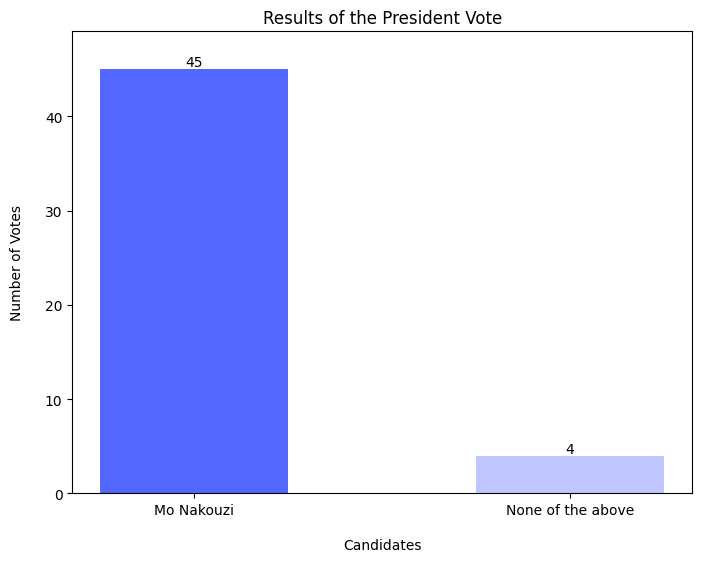

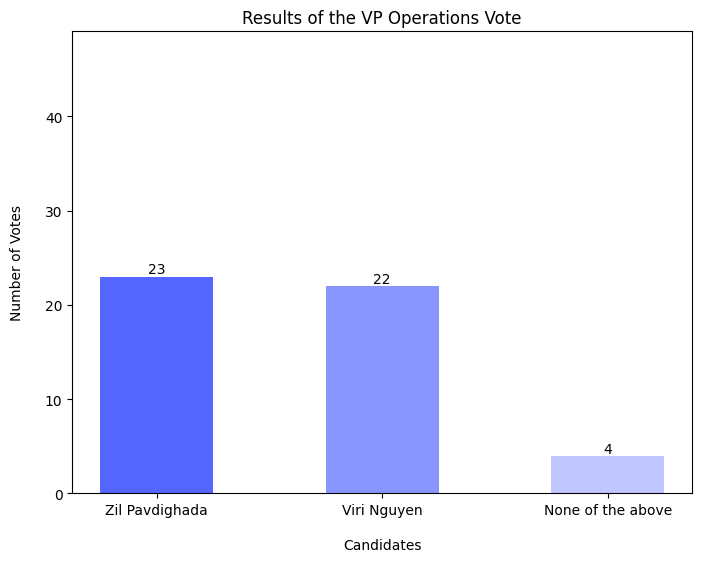

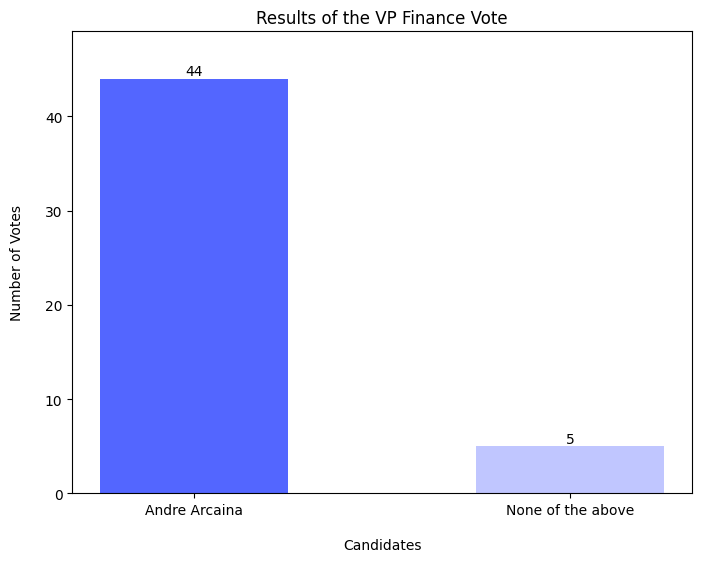

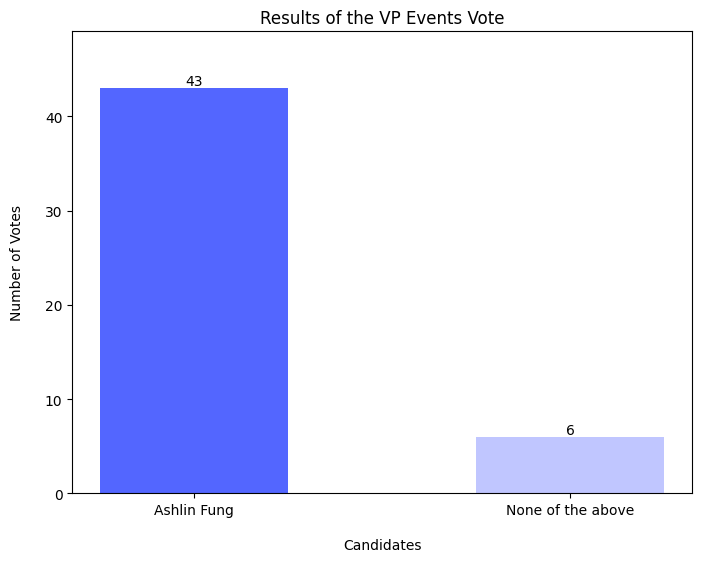

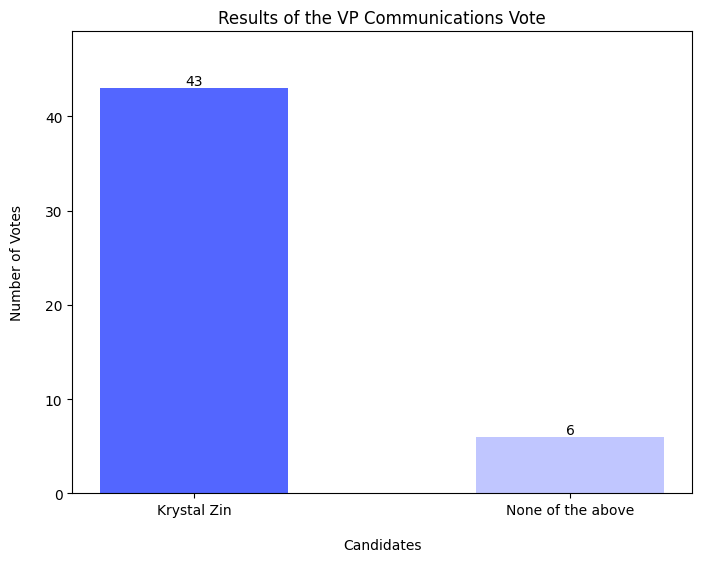

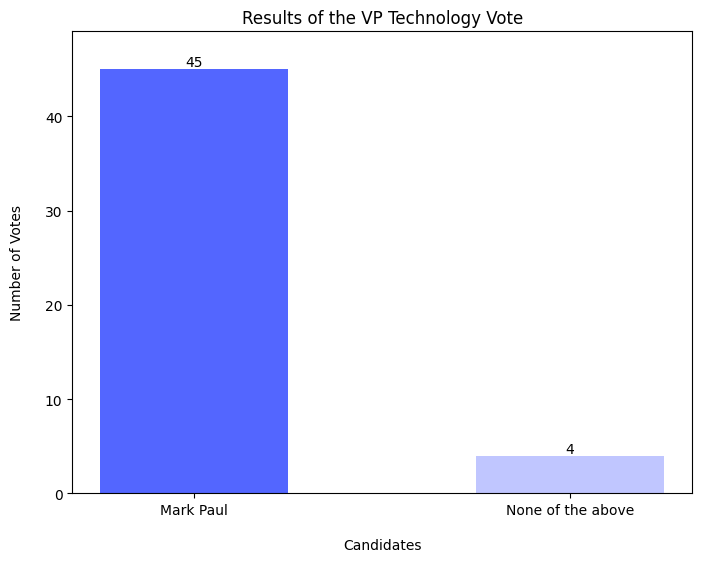

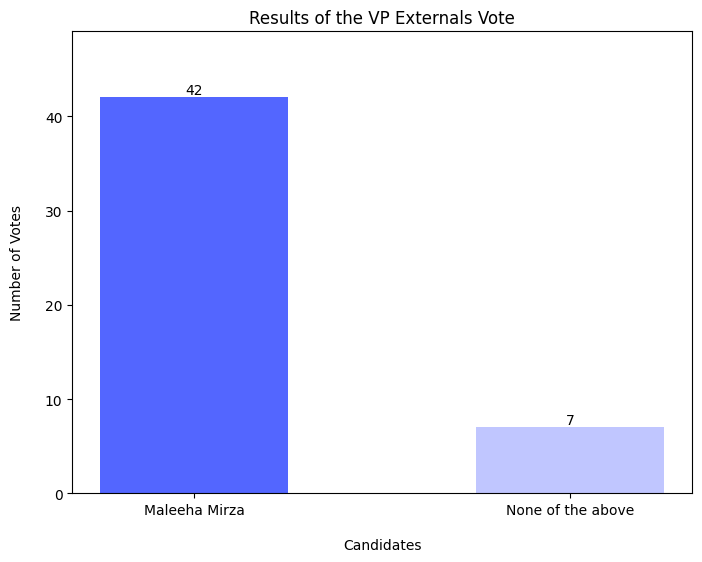

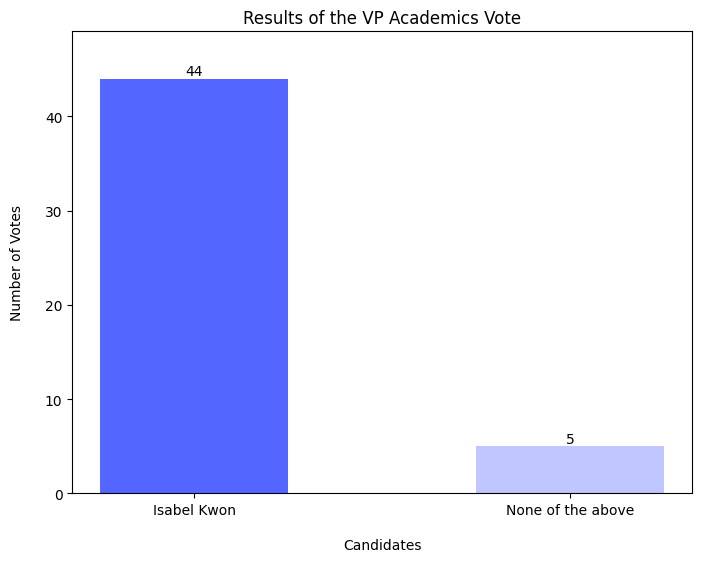

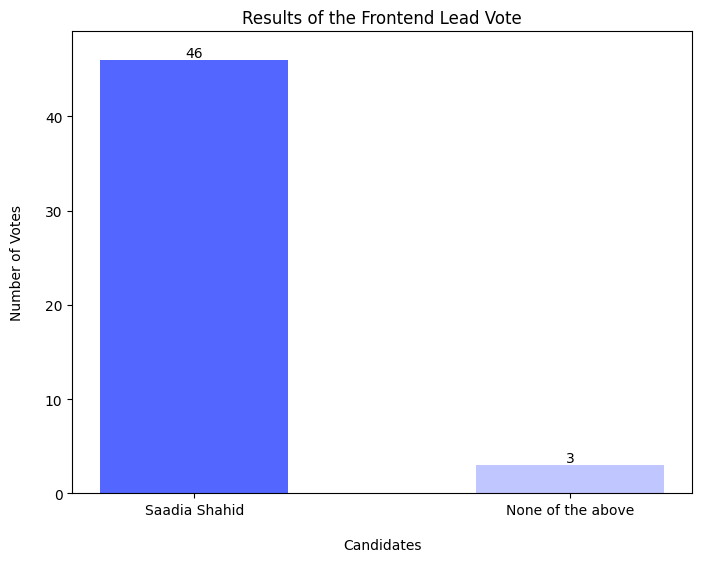

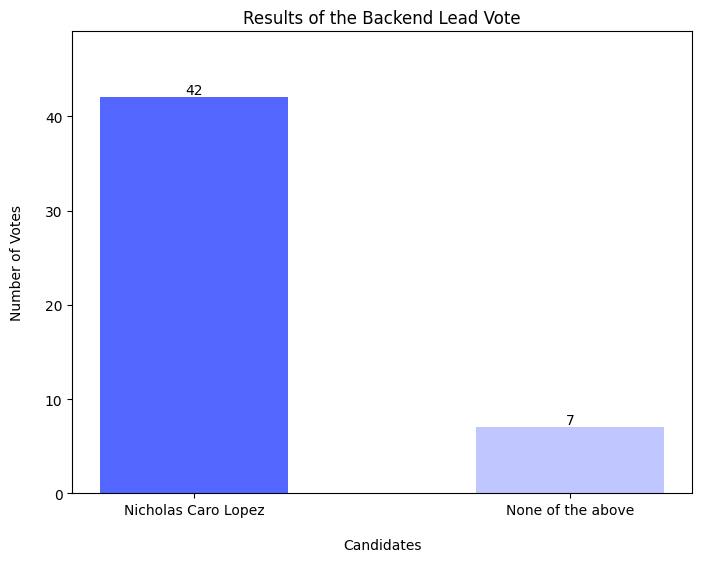

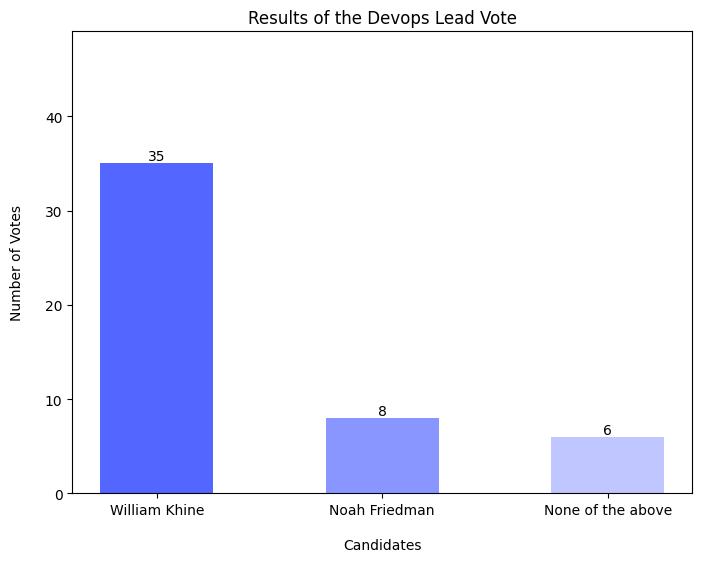

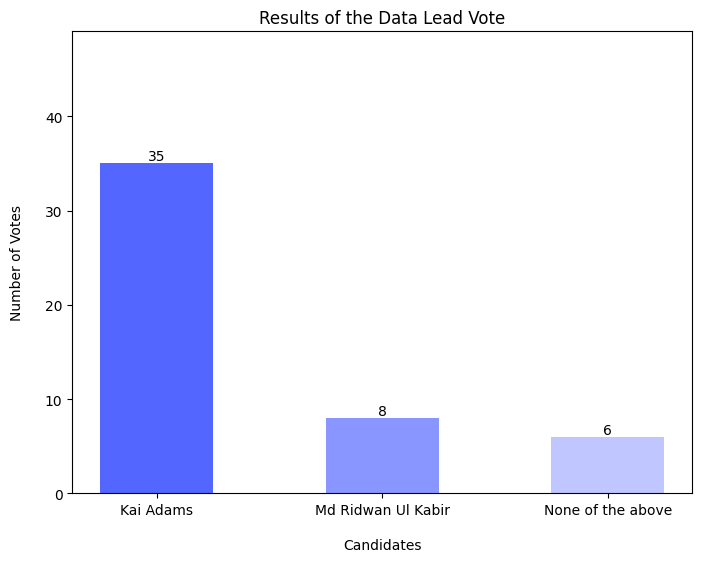

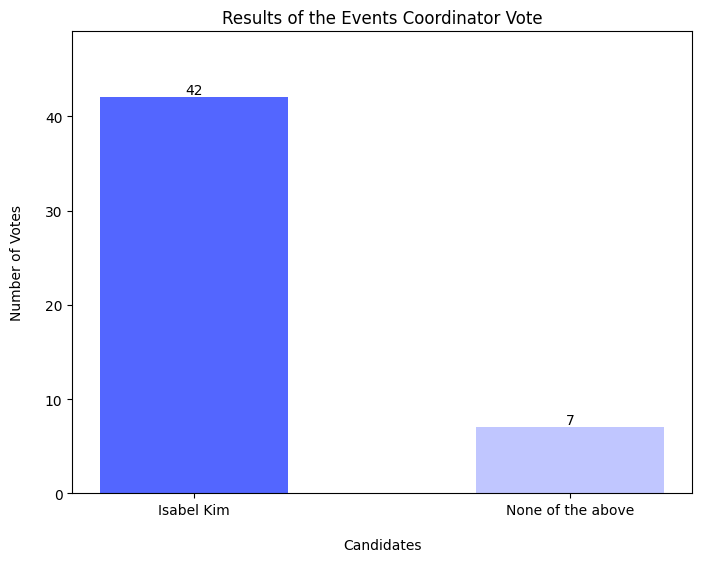

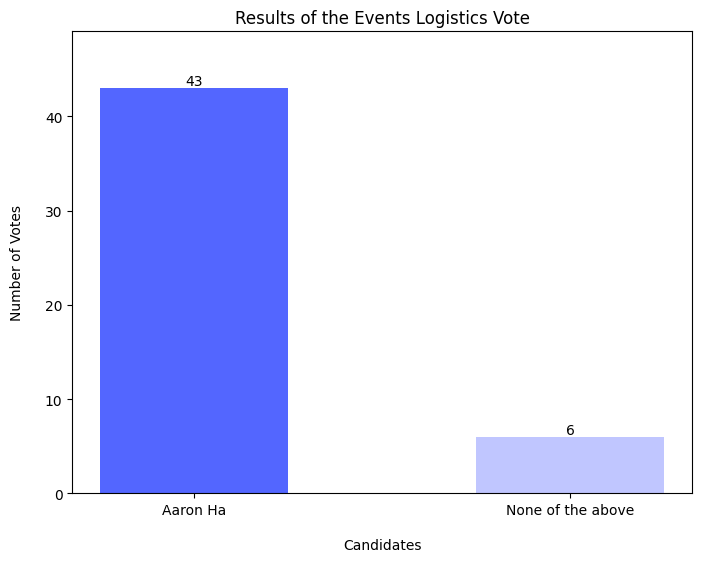

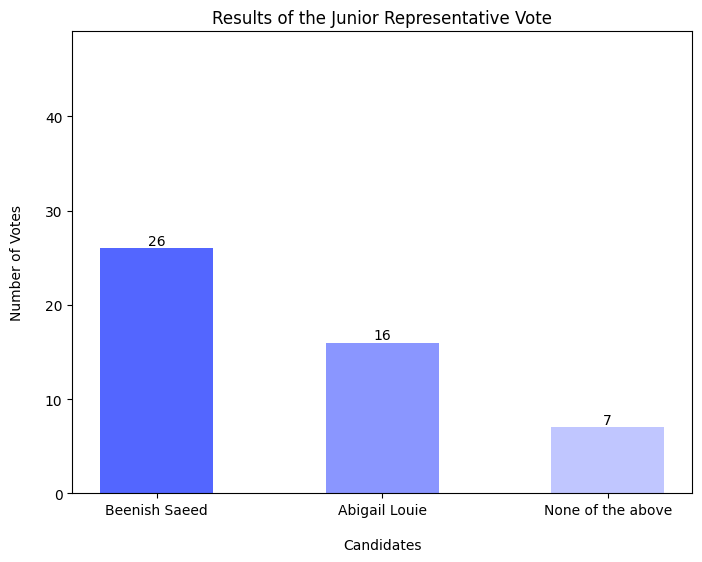

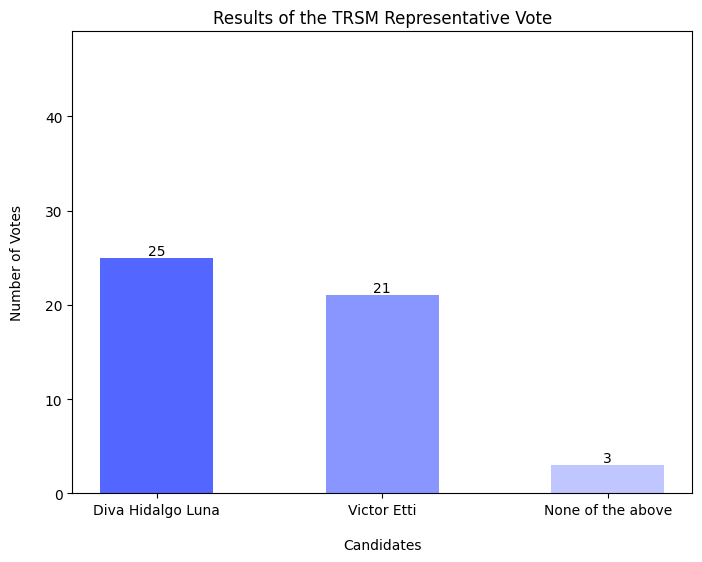

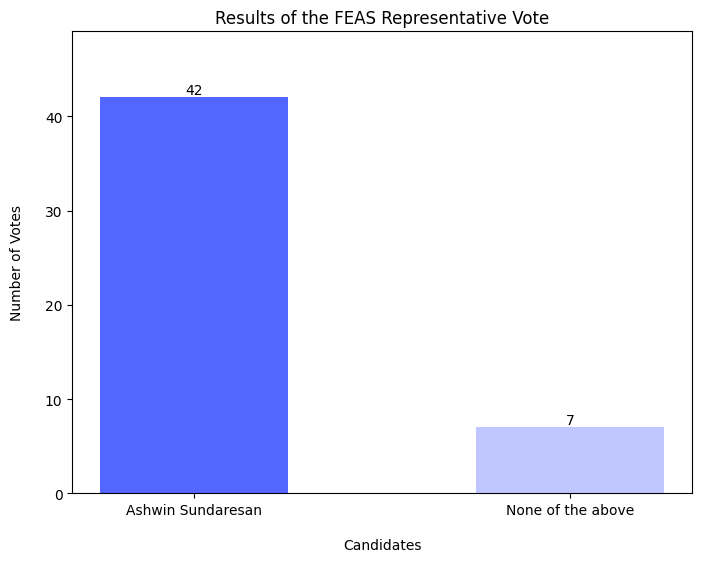

In [72]:
column_name = cleanPacs_df.columns.tolist()

column_name = column_name[2:] # Removing the first 2 column names as we dont need them right now


# Create a PdfPages object to store the figures
pdf_pages = PdfPages('ElectionsResults2024.pdf')

# Create a cover page
plt.figure(figsize=(8.5, 11))  # Set figure size to letter size (8.5x11 inches)
plt.text(0.5, 0.5, 'Practical Applications of\n\nComputer Science (PACS) 2024 Election Results', ha='center', va='center', fontsize=22)
plt.axis('off')  # Turn off axes

# Save the cover page to the PDF
pdf_pages.savefig()

# Close the cover page figure
plt.close()

# Loop through each item and run the function
for name in column_name:
    results(name)

# Close the PdfPages object
pdf_pages.close()